<a href="https://colab.research.google.com/github/lydiateinfalt/DATS6202-MachineLearningI-Fall2021/blob/main/Experiment2_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
DATS 6202 Group 1 Project
</font>
</center>
</p>

<p>
<center>
<font size="4">
Convolutional Neural Networks - VGG16 Pretrain and Learning rate schedule with a gradient descent optimizer (14.57% Accuracy)
</font>
</center>
</p>
    

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
by Adel Hassen, Lydia Teinfalt, Pedro Vasquez-Perez
</font>
</center>
</p>
</b>

<p>
<center>
<font size="3">
Last Updated: 11/30/2021
</font>
</center>
</p>
</b>

# Overview

- This notebook DATS 6202 Group Project for Fall 2021 semester. 
- Group 1 members are: Adel Hassen, Lydia Teinfalt, Pedro Vasquez-Perez
- Here we will work on Kaggle Intel Image Classification Dataset [Natural Scenes Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_train).
- The goal of this project is to classify approximately  25,000 images of size 150x150 distributed under 6 categories: 
  - {'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

# Notebook Configuration

## Google drive

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/DATS 6202/Project'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/DATS 6202/code/utilities/p3_deep_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [6]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/DATS 6202/code/utilities/p3_deep_learning


## Loading the data

In this case study, we will work on Intel Image Classification Dataset [Natural Scenes Image Classification](https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_train) from Kaggle.

### Creating the directory for the data

In [7]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/data/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Getting the name of the target

In [8]:
# Get the target
target = 'label'

In [9]:
data_dir = directory + '/seg_train/seg_train/'

#Cleaning up bad data

In [10]:
# Clean up bad data - Only need to run one time
import IPython.display as display
from PIL import Image



glacier_bad_list = [893, 2559, 3512, 3808, 4385, 4467, 4476, 5078, 5237, 5240, 5268, 5217, 5237, 5240, 6283, 6734, 7127, 7831, 8225, 8419, 8987, 9091, 9201, 9406, 9985, 10353, 10505, 
                    10467, 10935, 10970, 11070, 11537, 11821, 12083, 12624, 12845, 13417, 13644, 14851, 14860, 15267, 15039, 15290, 15468, 16334, 16416, 16467, 17168, 17312, 17682,
                    17841, 17926, 18044, 18162, 18709, 18736, 19441, 19622, 19667, 19900, 19975, 19988, 20007, 20028]


def clean_bad_data(directory, bad_list):
  num_files = os.listdir(directory)
  print("Number of files before delete =",len(num_files))

  for images in bad_list:
    image_filename = directory + str(images)+".jpg"
    if os.path.exists(image_filename):
      print(image_filename)
      display.display(Image.open(image_filename))
      os.remove(image_filename)
    else:
      print("The file does not exist:" + image_filename)
  num_after_files = os.listdir(directory)
  print("Number of files after delete =",len(num_after_files))
  

#clean glacier data
clean_bad_data(data_dir + "glacier/", glacier_bad_list)


Number of files before delete = 2342
The file does not exist:/content/drive/My Drive/Colab Notebooks/DATS 6202/Project/data/seg_train/seg_train/glacier/893.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/DATS 6202/Project/data/seg_train/seg_train/glacier/2559.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/DATS 6202/Project/data/seg_train/seg_train/glacier/3512.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/DATS 6202/Project/data/seg_train/seg_train/glacier/3808.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/DATS 6202/Project/data/seg_train/seg_train/glacier/4385.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/DATS 6202/Project/data/seg_train/seg_train/glacier/4467.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/DATS 6202/Project/data/seg_train/seg_train/glacier/4476.jpg
The file does not exist:/content/drive/My Drive/Colab Notebooks/DATS 6202/Project/data/seg_train

In [11]:
#clean up forest data
#forest_bad_list = [5610]
#clean_bad_data(data_dir + "forest/", forest_bad_list)


In [12]:
#clean up mountain data
#mountain_bad_list = [17496]
#clean_bad_data(data_dir + "mountain/", mountain_bad_list)

In [13]:
#clean up sea data
#sea_bad_list = [1635, 1490, 1791, 2358, 2489, 4410, 4651, 5149, 5231, 5129,5407, 5669, 6597, 9313, 10955, 11183, 11211, 11412, 11526, 12048, 13858, 13893, 15122, 15124, 16206, 16581, 18302, 18689]
#clean_bad_data(data_dir + "sea/", sea_bad_list)

## Getting the training, validation and test data

### Training Data

In [14]:
#Keeping 80% of original training data
data_dir = directory + '/seg_train/seg_train/'
data_train = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2,
    subset="training",
    seed = random_seed,
    image_size = (150,150))

Found 13942 files belonging to 6 classes.
Using 11154 files for training.


### Validation Data

In [15]:
#Splitting 20% of the training data to be used for validation
data_valid = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2,
    subset="validation",
    seed = random_seed,
    image_size = (150,150))

Found 13942 files belonging to 6 classes.
Using 2788 files for validation.


### Test Data

In [16]:
data_test_dir = directory + '/seg_test/seg_test/'
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_dir, 
    seed = random_seed,
    image_size = (150,150))

Found 3000 files belonging to 6 classes.


##Verify Training and Test Class Names Match

In [17]:
#As part of data preprocessing, ensuring that the class names match between training and test data. They are the same.
equivalence_check = data_train.class_names == data_valid.class_names == data_test.class_names
assert_fail_message = "Training, Validation, and Test classes should match"
assert(equivalence_check), assert_fail_message

# Get the class names
class_names = data_train.class_names

# Print class names
print(class_names)

# Get the number of classes
n_classes = len(class_names)

# Print number of classes
print(n_classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
6


In [18]:
# Display number of images for each class in training
train_classes_dict = {}
for names in class_names:
  count =len(data_train.list_files(data_dir + "/" + str(names) + "/*.jpg"))
  train_classes_dict.update({names:count})
print(train_classes_dict)

# Display number of images for each class in validation 
valid_classes_dict = {}
for names in class_names:
  count =len(data_valid.list_files(data_dir + "/" + str(names) + "/*.jpg"))
  valid_classes_dict.update({names:count})
print(valid_classes_dict)

# Display number of images for each class in test 
test_classes_dict = {}
for names in class_names:
  count =len(data_test.list_files(data_test_dir + "/" + str(names) + "/*.jpg"))
  test_classes_dict.update({names:count})
print(test_classes_dict)

{'buildings': 2191, 'forest': 2270, 'glacier': 2342, 'mountain': 2511, 'sea': 2246, 'street': 2382}
{'buildings': 2191, 'forest': 2270, 'glacier': 2342, 'mountain': 2511, 'sea': 2246, 'street': 2382}
{'buildings': 437, 'forest': 474, 'glacier': 553, 'mountain': 525, 'sea': 510, 'street': 501}


##Visualize the Data

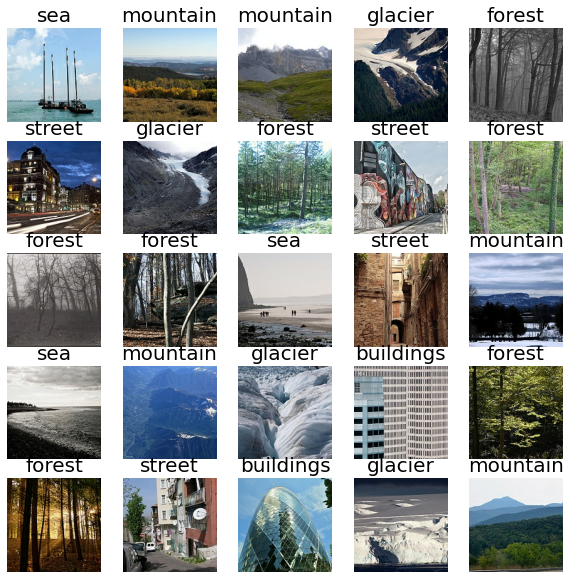

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Resizing the data for pretrained model

In [20]:
#Commented out code because it caused input shape error
# Set the default input size for the pretrained model
#global input_size
#input_size = [224, 224]

In [21]:
#Commented out code because it caused input shape error
# Resize the training data
#data_train = data_train.map(resize)

# Resize the validation data
#data_valid = data_valid.map(resize)

# Resize the test data
#data_test = data_test.map(resize)

## Preprocessing the data using pretrained model

In [25]:
# Set the preprocess_input of the pretrained model .VGG16.preprocess_input
global preprocess_input
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [26]:
# Preprocess the training data using pretrained model
data_train = data_train.map(preprocess_pretrain)

# Preprocess the validation data using pretrained model
data_valid = data_valid.map(preprocess_pretrain)

# Preprocess the test data using pretrained model
data_test = data_test.map(preprocess_pretrain)

In [27]:
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)


## Shuffling, batching and prefetching the data

In [ ]:
#Commented out code because it caused input shape error
# Shuffling the training data
#data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
#batch_size = 32

# Batch and prefetch the training data
#data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
#data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
#data_test = data_test.batch(batch_size).prefetch(1)

# Training

## Creating the directory for the model

In [28]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [29]:
# Add the pretrained layers
pretrained_model = keras.applications.VGG16(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## Freezing the pretrained layers

In [30]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

## Setting Callbacks

In [31]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

## Compiling the model
Here we use the learning rate schedule with a gradient descent optimizer.

In [32]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(decay=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [33]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])


Epoch 1/10
349/349 [==============================] - 894s 1s/step - loss: 1.2725 - accuracy: 0.8498 - val_loss: 0.7124 - val_accuracy: 0.8949 - lr: 0.0100
Epoch 2/10
349/349 [==============================] - 27s 46ms/step - loss: 0.8191 - accuracy: 0.8852 - val_loss: 0.6092 - val_accuracy: 0.9049 - lr: 0.0100
Epoch 3/10
349/349 [==============================] - 27s 46ms/step - loss: 0.7074 - accuracy: 0.8893 - val_loss: 0.5936 - val_accuracy: 0.9028 - lr: 0.0100
Epoch 4/10
349/349 [==============================] - 26s 43ms/step - loss: 0.7175 - accuracy: 0.8914 - val_loss: 0.6357 - val_accuracy: 0.9060 - lr: 0.0100
Epoch 5/10
349/349 [==============================] - 27s 46ms/step - loss: 0.3772 - accuracy: 0.9263 - val_loss: 0.5232 - val_accuracy: 0.9093 - lr: 1.0000e-03
Epoch 6/10
349/349 [==============================] - 27s 47ms/step - loss: 0.3137 - accuracy: 0.9302 - val_loss: 0.4860 - val_accuracy: 0.9107 - lr: 1.0000e-03
Epoch 7/10
349/349 [==============================]

## Plotting the learning curve

### Creating the directory for the figure

In [34]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

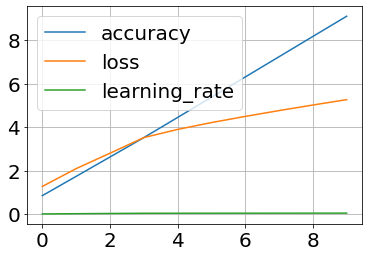

In [35]:
import pandas as pd

variables = pd.DataFrame({'accuracy': history.history['accuracy'], 
                       'loss': history.history['loss'], 
                       'learning_rate': history.history['lr']})
variables.cumsum(0).plot(grid=True)


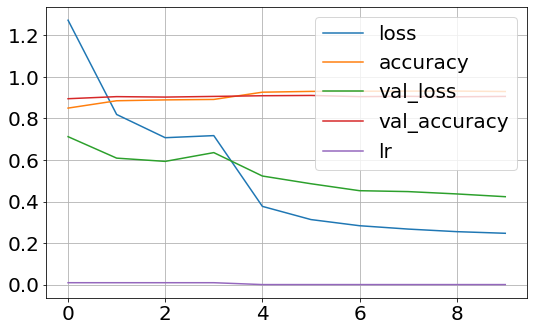

In [36]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the pretrained layers

In [37]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model
Here we use the learning rate schedule with a gradient descent optimizer.

In [ ]:
# Compile the model
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [38]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(decay=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [39]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
349/349 [==============================] - 53s 116ms/step - loss: nan - accuracy: 0.1604 - val_loss: nan - val_accuracy: 0.1542 - lr: 0.0100
Epoch 2/10
349/349 [==============================] - 51s 115ms/step - loss: nan - accuracy: 0.1579 - val_loss: nan - val_accuracy: 0.1542 - lr: 1.0000e-03


## Plotting the learning curve

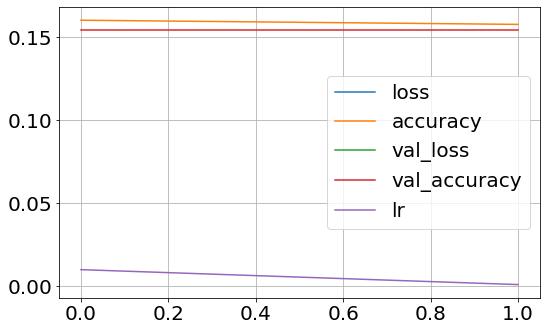

In [40]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing.pdf')
plt.show()

# Testing

## Evaluating the model

*   Loss = 0.2170
*   Accuracy = 0.9327


In [41]:
loss, accuracy = model.evaluate(data_test)

94/94 [==============================] - 440s 4s/step - loss: nan - accuracy: 0.1457


# Reference
- The code for building, compiling and training CNNs were largely inspired by the following work:
    - Géron, A., 2019. *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. O'Reilly Media.

- The deep utitilities and pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s3 convolutional_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2021/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb)
    - Huang, Yuxiao, 2021. "Machine Learning I". Fall 2021.


- [Tensorflow load and preprocess images](https://tensorflow.google.cn/tutorials/load_data/images?hl=en)

